<h1>Cosmological Model Comparision</h1>

Something intelligent goes here.


Version of ModelPlots.ipynb using more astropy code and classy.

Equations in this notebook are taken from the following:
\[[1](http://arxiv.org/abs/1201.2434v2)]
\[[2](http://arxiv.org/abs/astro-ph/9905116)]

In [1]:
%pylab inline
import scipy.integrate
from astropy import cosmology, units as u, constants as const
from classy import Class

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_comp(x, y, title1, title2, comp1=None, comp2=None, comp3=None, comp4=None,
              comp5 = None, comp6 = None, compfill = None, xlabel = '$z$', xscale = None,
              yscale = None, xlim = None, mainylim = None, diffylim = None,
              mainlabel = '$\mathrm{flat} \; \Lambda CDM$'):
    """
    Plots y and comparisons of the form Delta y / y. 
    
    Arguments:
        x (np.array): independent axis
        y (np.array): dependent axis to be compared against
        title1 (str): y-axis label for original plot
        title2 (str): y-axis label for comparison plot
        comp1-4 (tuple of (np.array, str)): Comparison y axis data and legend entry
        compfill (tuple of (np.array, np.array)): Error to fill in difference plot
        xlabel (str): x-axis label for both plots
    """
    plt.figure(figsize = (6,6.5))
    gs = matplotlib.gridspec.GridSpec(2,1,height_ratios=[8,3])
    gs.update(hspace=0.05)
    
    ax1 = plt.subplot(gs[0])
    ax1.plot(x, y, 'k-', linewidth = 1.5)
    ax1.set_ylabel(title1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    if xscale:
        ax1.set_xscale(xscale)
    if yscale:
        ax1.set_yscale(yscale)
    if mainylim:
        ax1.set_ylim(mainylim)
    
    
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.plot(x, np.zeros(len(x)), 'k-', linewidth = 1.5, label = mainlabel)
    if compfill:
        ax2.fill_between(x, compfill[0], compfill[1], color = 'k', alpha = 0.2)
    if comp1:
        ax2.plot(x, (comp1[0]-y)/y, 'r:',  linewidth = 1.5, label = comp1[1])
    if comp2:
        ax2.plot(x, (comp2[0]-y)/y, 'b--',  linewidth = 1.5, label = comp2[1])
    if comp3:
        ax2.plot(x, (comp3[0]-y)/y, 'y--',  linewidth = 1.5, dashes = (15,5), label = comp3[1])
    if comp4:
        ax2.plot(x, (comp4[0]-y)/y, 'g-.',  linewidth = 1.5, label = comp4[1])
    if comp5:
        ax2.plot(x, (comp5[0]-y)/y, 'c:',  linewidth = 1.5, label = comp5[1])
    if comp6:
        ax2.plot(x, (comp6[0]-y)/y, 'm--',  linewidth = 1.5, label = comp6[1])
    ax2.set_ylabel(title2)
    ax2.set_xlabel(xlabel)
    if diffylim:
        ax2.set_ylim(diffylim)
    if xlim:
        ax1.set_xlim(xlim)
    
    handles, labels = ax2.get_legend_handles_labels()
    ax1.legend(handles, labels, loc = 0, frameon = False, handlelength = 3.5)
    
    plt.show()

In [3]:
Z = np.linspace(0,3,num=901)
cosmo1 = cosmology.FlatLambdaCDM(71.0, 0.222 + 0.045, Ob0 = 0.045)
cosmopos = cosmology.LambdaCDM(77.6, 0.186 + 0.038, 0.766, Ob0 = 0.038)
cosmoneg = cosmology.LambdaCDM(66.1, 0.256 + 0.052, 0.702, Ob0 = 0.052)
cosmo9 = cosmology.Flatw0waCDM(67.5, 0.246 + 0.050, w0 = -0.9, Ob0 = 0.050)
cosmo11 = cosmology.Flatw0waCDM(74.6, 0.201 + 0.041, w0 = -1.1, Ob0 = 0.041)
#cosmo5 = cosmology.Flatw0waCDM(71.0, 0.222 + 0.045, wa = 0.5, Ob0 = 0.045)
#cosmo15 = cosmology.Flatw0waCDM(71.0, 0.222 + 0.045, wa = -0.5, Ob0 = 0.045)

In [4]:
cosmo5 = cosmology.Flatw0waCDM(65.2, 0.317, w0 = -0.99, wa = 0.5, Ob0 = 0.053)
cosmo15 = cosmology.Flatw0waCDM(76.0, 0.233, w0 = -1.01, wa = -0.5, Ob0 = 0.039)

The Hubble parameter (the logarithmic rate of expansion of the universe) is defined as
$$H(z) = H_0 \sqrt{\Omega_m(1+z)^3 + \Omega_r(1+z)^4 + \Omega_k(1+z)^2 + \Omega_\phi \frac{u_\phi(z)}{u_\phi(z=0)}},$$
where the component for dark energy is
$$\frac{u_\phi(z)}{u_\phi(z=0)} = \exp{\left[3 \int_0^z [1+w(z')]\frac{\mathrm d z'}{1+z'}\right]}.$$
Here $w(z)$ is the equation of state parameter for dark energy.

Using the paramaterization
\begin{align}
w &= w_0 + w_a(1-a) \\
&= w_0 + w_a \frac{z}{1+z},
\end{align}
the component for dark energy simplifies to
$$\frac{u_\phi(z)}{u_\phi(z=0)} = (1+z)^{3(1+w_0+w_a)} \exp{\left(-\frac{3w_az}{1+z}\right)}.$$

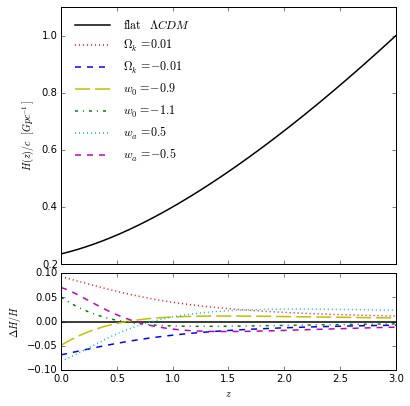

In [5]:
#1 / Hubble distance
plot_comp(Z, (cosmo1.H(Z) / const.c).to(1 / u.Gpc), '$H (z) / c$  $[Gpc^{-1}]$', '$\Delta H/H$',
          comp1=((cosmopos.H(Z) / const.c).to(1 / u.Gpc), '$\Omega_k=0.01$'),
          comp2=((cosmoneg.H(Z) / const.c).to(1 / u.Gpc), '$\Omega_k=-0.01$'),
          comp3=((cosmo9.H(Z) / const.c).to(1 / u.Gpc), '$w_0=-0.9$'),
          comp4=((cosmo11.H(Z) / const.c).to(1 / u.Gpc), '$w_0=-1.1$'),
          comp5=((cosmo5.H(Z) / const.c).to(1 / u.Gpc), '$w_a=0.5$'),
          comp6=((cosmo15.H(Z) / const.c).to(1 / u.Gpc), '$w_a=-0.5$'))

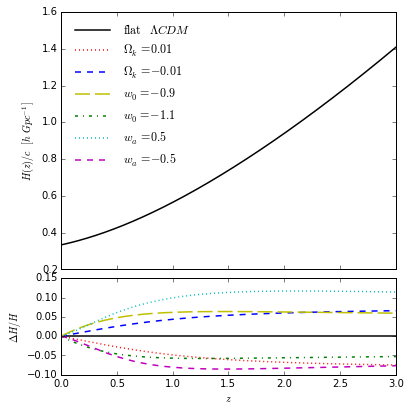

In [6]:
#h / Hubble distance 
plot_comp(Z, (cosmo1.H(Z) / const.c).to(1 / u.Gpc) / cosmo1.h, '$H (z) / c$  $[h \, Gpc^{-1}]$', '$\Delta H/H$',
          comp1=((cosmopos.H(Z) / const.c).to(1 / u.Gpc) / cosmopos.h, '$\Omega_k=0.01$'),
          comp2=((cosmoneg.H(Z) / const.c).to(1 / u.Gpc) / cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=((cosmo9.H(Z) / const.c).to(1 / u.Gpc) / cosmo9.h, '$w_0=-0.9$'),
          comp4=((cosmo11.H(Z) / const.c).to(1 / u.Gpc) / cosmo11.h, '$w_0=-1.1$'),
          comp5=((cosmo5.H(Z) / const.c).to(1 / u.Gpc) / cosmo5.h, '$w_a=0.5$'),
          comp6=((cosmo15.H(Z) / const.c).to(1 / u.Gpc) / cosmo15.h, '$w_a=-0.5$'))

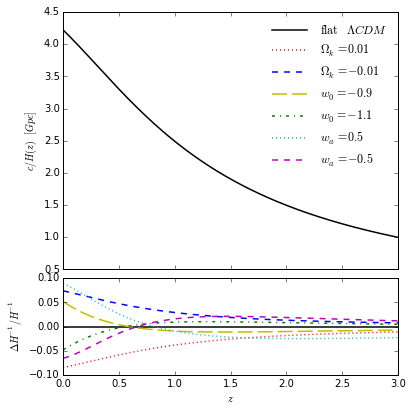

In [7]:
#Hubble distance
plot_comp(Z, (const.c / cosmo1.H(Z)).to(u.Gpc), '$c / H (z)$  $[Gpc]$', '$\Delta H^{-1}/H^{-1}$',
          comp1=((const.c / cosmopos.H(Z)).to(u.Gpc), '$\Omega_k=0.01$'),
          comp2=((const.c / cosmoneg.H(Z)).to(u.Gpc), '$\Omega_k=-0.01$'),
          comp3=((const.c / cosmo9.H(Z)).to(u.Gpc), '$w_0=-0.9$'),
          comp4=((const.c / cosmo11.H(Z)).to(u.Gpc), '$w_0=-1.1$'),
          comp5=((const.c / cosmo5.H(Z)).to(u.Gpc), '$w_a=0.5$'),
          comp6=((const.c / cosmo15.H(Z)).to(u.Gpc), '$w_a=-0.5$'))

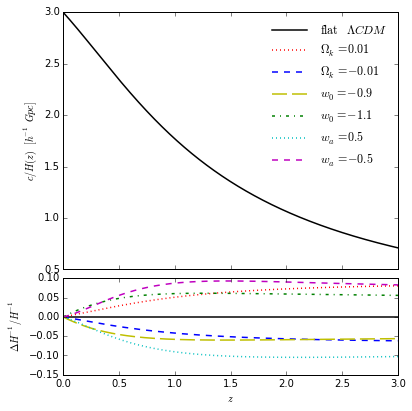

In [8]:
#Hubble distance / h
plot_comp(Z, (const.c / cosmo1.H(Z)).to(u.Gpc) * cosmo1.h, '$c / H (z)$  $[h^{-1} \, Gpc]$', '$\Delta H^{-1}/H^{-1}$',
          comp1=((const.c / cosmopos.H(Z)).to(u.Gpc) * cosmopos.h, '$\Omega_k=0.01$'),
          comp2=((const.c / cosmoneg.H(Z)).to(u.Gpc) * cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=((const.c / cosmo9.H(Z)).to(u.Gpc) * cosmo9.h, '$w_0=-0.9$'),
          comp4=((const.c / cosmo11.H(Z)).to(u.Gpc) * cosmo11.h, '$w_0=-1.1$'),
          comp5=((const.c / cosmo5.H(Z)).to(u.Gpc) * cosmo5.h, '$w_a=0.5$'),
          comp6=((const.c / cosmo15.H(Z)).to(u.Gpc) * cosmo15.h, '$w_a=-0.5$'))

The comoving distance to an object is
$$D_C(z) = \mathrm c \int_0^z \frac{\mathrm d z'}{H(z')}.$$

The angular diameter distance of an object is
$$D_A(z) = K^{-1/2} \sin \left( K^{1/2} D_C \right),$$
where
$$K = - \Omega_k \left( c / H_0 \right)^2.$$
For cosmologies where $\Omega_k = 0$, $D_A = D_C$.

Note that in astropy, the comoving_transverse_distance function gives the angular diameter distance as defined here; the angular_diameter_distance function returns $D_A$ multiplied by the scale factor (the same definition used by CLASS).

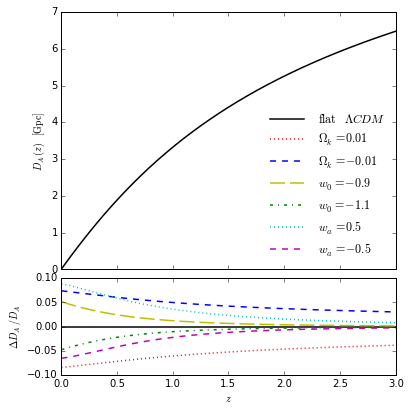

In [9]:
#Angular diameter distance
plot_comp(Z[1:], cosmo1.comoving_transverse_distance(Z[1:]).to('Gpc'), r'$D_A (z) \; [\mathrm{Gpc}]$', '$\Delta D_A/D_A$',
          comp1=(cosmopos.comoving_transverse_distance(Z[1:]).to('Gpc'), '$\Omega_k=0.01$'),
          comp2=(cosmoneg.comoving_transverse_distance(Z[1:]).to('Gpc'), '$\Omega_k=-0.01$'),
          comp3=(cosmo9.comoving_transverse_distance(Z[1:]).to('Gpc'), '$w_0=-0.9$'),
          comp4=(cosmo11.comoving_transverse_distance(Z[1:]).to('Gpc'), '$w_0=-1.1$'),
          comp5=(cosmo5.comoving_transverse_distance(Z[1:]).to('Gpc'), '$w_a=0.5$'),
          comp6=(cosmo15.comoving_transverse_distance(Z[1:]).to('Gpc'), '$w_a=-0.5$'))

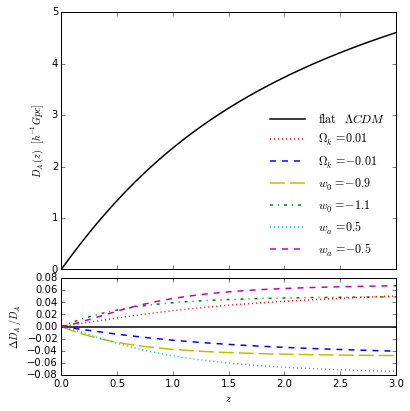

In [10]:
#Angular diameter distance * h
plot_comp(Z[1:], cosmo1.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmo1.h,
          '$D_A (z)$  $[h^{-1} Gpc]$', '$\Delta D_A/D_A$',
          comp1=(cosmopos.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmopos.h, '$\Omega_k=0.01$'),
          comp2=(cosmoneg.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmoneg.h, '$\Omega_k=-0.01$'),
          comp3=(cosmo9.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmo9.h, '$w_0=-0.9$'),
          comp4=(cosmo11.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmo11.h, '$w_0=-1.1$'),
          comp5=(cosmo5.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmo5.h, '$w_a=0.5$'),
          comp6=(cosmo15.comoving_transverse_distance(Z[1:]).to('Gpc') * cosmo15.h, '$w_a=-0.5$'))

The growth function $G$ satisfies the following second order odinary differential equation:
$$\ddot{G} + 2H(z)\dot{G} -\frac{3}{2}\Omega_mH^2_0(1+z)^3G = 0.$$
While this equation is in terms of time derivatives, experimentally it is easier to work with derivatives in $z$. Converting this equation requires the relation
$$\frac{\mathrm d a}{\mathrm d t} = \frac{\mathrm d a}{\mathrm d z}\frac{\mathrm d z}{\mathrm d t},$$
and the definitions $1+z = a^{-1}$ and $\dot{a} = aH(a)$. These give a relationship between $z$ and $t$:
$$(1+z)^{-1}H(z) = -(1+z)^{-2}\frac{\mathrm d z}{\mathrm d t},$$
$$\frac{\mathrm d z}{\mathrm d t} = -(1+z)H(z).$$

Using the chain rule on $\dot{G}$ obtains
$$\frac{\mathrm d G}{\mathrm d t} = -(1+z)H(z) \frac{\mathrm d G}{\mathrm d z}.$$
Repeating for $\ddot{G}$ gives
\begin{align}
\frac{\mathrm d^2 G}{\mathrm d t^2} &= -(1+z)H(z) \frac{\mathrm d}{\mathrm d z}\left[-(1+z)H(z)\frac{\mathrm d G}{\mathrm d z}\right], \\
&= (1+z)H(z) \left[\frac{\mathrm d G}{\mathrm d z}H(z) + \frac{\mathrm d G}{\mathrm d z}(1+z)\frac{\mathrm d H}{\mathrm d z} + \frac{\mathrm d^2 G}{\mathrm d z^2}(1+z)H(z)\right],
\end{align}
where
$$\frac{\mathrm d H}{\mathrm d z} = \frac{H^2_0}{2H(z)}[3\Omega_m(1+z)^2 + 4\Omega_r(1+z)^3 + 2\Omega_k(1+z) + \frac{3(1+w_0+z+w_0z+w_az)}{(1+z)^2}\Omega_\phi(1+z)^{3(1+w_0+w_a)}\exp{\left(\frac{-3w_az}{1+z}\right)}].$$
Using the notation $H(z) = H_0 E(z)$, this can be written more compactly as
$$\frac{\mathrm d H}{\mathrm d z} = \frac{H^2_0}{2H(z)}\frac{\mathrm d E^2}{\mathrm d z}.$$

Plugging these into the original ODE gives
$$(1+z)^2H(z)^2G'' + \left[-(1+z)H(z)^2+(1+z)^2\frac{H_0^2}{2}\frac{\mathrm d E^2}{\mathrm d z}\right]G' - \frac{3}{2}\Omega_mH_0^2(1+z)^3G = 0.$$
Rewritten in the form $G'' = f(z,G',G)$, we have
$$G'' = \frac{1}{(1+z)^2H(z)^2}\left\{\left[(1+z)H(z)^2 - (1+z)^2\frac{H_0^2}{2}\frac{\mathrm d E^2}{\mathrm d z}\right]G' + \frac{3}{2}\Omega_mH_0^2(1+z)^3G\right\}.$$

In [11]:
def Growth(z, g, arg1):
    """
    Returns derivatives for Growth function. (Used for scipy ode)
    
    Arguments:
        z (np.array): redshift value(s) to find derivatives at
        g ([float]): list of current values of G and G'
        arg1 (astropy.cosmology.w0waCDM): w0waCDM class for which to calculate growth function
    
    Returns
        dgdz ([float]): list of G' and G''
    """
    G, Gprime = g
    Om, Op, Or, Ok, H0 = (arg1.Om0, arg1.Ode0, arg1.Ogamma0, arg1.Ok0, arg1.H0)
    try:
        w0, wa = (arg1.w0, arg1.wa)
    except AttributeError:
        w0, wa = (-1.0, 0.0)
    gppcoeff = ((1 + z) * arg1.H(z)) ** 2
    Opp = (3 * (1 + w0 + z + w0 * z + wa * z) * Op
           * (1 + z) ** (3 * w0 + 3 * wa + 1)
           * np.exp(-3 * wa * z / (1 + z)))
    E2p = (3 * Om * (1 + z) ** 2 + 4 * Or * (1 + z) ** 3
           + 2 * Ok * (1 + z) + Opp)
    gpcoeff = ((1 + z) * arg1.H(z) ** 2
               - (1 + z) ** 2 * E2p * H0 ** 2 / 2)
    gcoeff = 3 * Om * H0 ** 2 * (1 + z) ** 3 / 2
    dgdz = [Gprime, (gpcoeff / gppcoeff).to(1) * Gprime + (gcoeff / gppcoeff).to(1) * G]
    return dgdz

In [12]:
g0 = [1.0, -0.1]
t = np.linspace(0, 9, 2701)
ode = scipy.integrate.ode(Growth)
ode.set_integrator("dopri5")

In [13]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo1)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow1 = res[::-1,:]

In [14]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmopos)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
growpos = res[::-1,:]

In [15]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmoneg)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
growneg = res[::-1,:]

In [16]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo9)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow9 = res[::-1,:]

In [17]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo11)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow11 = res[::-1,:]

In [18]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo5)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow5 = res[::-1,:]

In [19]:
ode.set_initial_value(g0, 9.0)
ode.set_f_params(cosmo15)
res = np.array(g0)
for time in t[::-1][1:]:
    res = np.vstack((res,ode.integrate(time)))
grow15 = res[::-1,:]

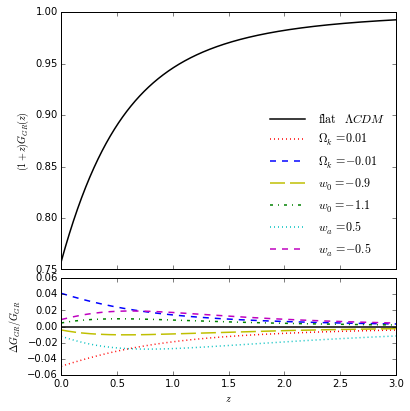

In [20]:
#Growth Function
plot_comp(Z, (1 + Z) * grow1[:901,0] / 10,
          '$(1+z)G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1 + Z) * growpos[:901,0] / 10, '$\Omega_k=0.01$'),
          comp2=((1 + Z) * growneg[:901,0] / 10, '$\Omega_k=-0.01$'),
          comp3=((1 + Z) * grow9[:901,0] / 10, '$w_0=-0.9$'),
          comp4=((1 + Z) * grow11[:901,0] / 10, '$w_0=-1.1$'),
          comp5=((1 + Z) * grow5[:901,0] / 10, '$w_a=0.5$'),
          comp6=((1 + Z) * grow15[:901,0] / 10, '$w_a=-0.5$'))

The growth function can be approximated using
$$f_{GR}(z) \equiv \frac{\mathrm d \ln{G_{GR}}}{\mathrm d \ln{a}} \approx [\Omega_m(z)]^\gamma$$
$$\frac{G(z)}{G(z=9)} \approx \exp{\left[ \int_z^9 \frac{\mathrm d z'}{1+z'} [\Omega_m(z')]^\gamma \right]}$$
with
$$\gamma = 0.55 + 0.05[1+w(z=1)].$$

In [21]:
def loggrow(z, arg1):
    """
    Returns approximate value of logrithmic derivative of Growth function
    
    Arguments:
        z (np.array): redshift values to evaluate at
        arg1 (astropy.cosmology.w0waCDM): w0waCDM object containing information on universe to analyze
    
    Returns
        f (np.array): approximate values of the growth function logrithmic derivative
    """
    Om, H0 = (arg1.Om0, arg1.H0)
    try:
        w0, wa = (arg1.w0, arg1.wa)
    except AttributeError:
        w0, wa = (-1.0, 0.0)
    w = w0 + wa / 2
    gamma = 0.55 + 0.05 * (1 + w)
    Omz = (Om * (1 + z) ** 3 * H0 ** 2
                 / (arg1.H(z) ** 2)).to(1)
    f = Omz ** gamma
    return f

def Growth2(z, arg1):
    """
    Returns approximate value of Growth function (z <= 9)
    
    Arguments:
        z (np.array): descending redshift values to evaluate at (first entry must be 9.0)
        arg1 (astropy.cosmology.w0waCDM): w0waCDM object containing information on universe to analyze
    
    Returns
        grow (np.array): approximate values of the growth function
    """
    integrand = -1 * loggrow(z, arg1) / (1 + z)
    exponent = scipy.integrate.cumtrapz(integrand, z, initial = 0)
    grow = np.exp(exponent)
    return grow

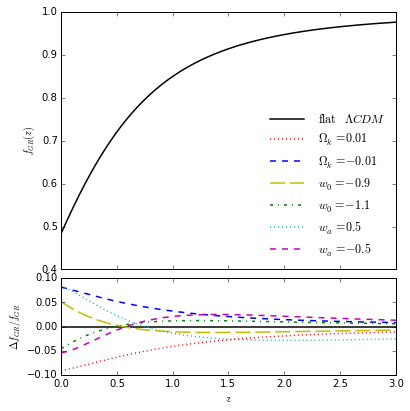

In [22]:
#Approximate Logarithmic Growth Function
plot_comp(Z, loggrow(Z, cosmo1), '$f_{GR}(z)$', '$\Delta f_{GR}/f_{GR}$',
          comp1=(loggrow(Z, cosmopos), '$\Omega_k=0.01$'),
          comp2=(loggrow(Z, cosmoneg), '$\Omega_k=-0.01$'),
          comp3=(loggrow(Z, cosmo9), '$w_0=-0.9$'),
          comp4=(loggrow(Z, cosmo11), '$w_0=-1.1$'),
          comp5=(loggrow(Z, cosmo5), '$w_a=0.5$'),
          comp6=(loggrow(Z, cosmo15), '$w_a=-0.5$'))

In [23]:
growapp1 = Growth2(t[::-1],cosmo1)
growapppos = Growth2(t[::-1],cosmopos)
growappneg = Growth2(t[::-1],cosmoneg)
growapp9 = Growth2(t[::-1],cosmo9)
growapp11 = Growth2(t[::-1],cosmo11)
growapp5 = Growth2(t[::-1],cosmo5)
growapp15 = Growth2(t[::-1],cosmo15)

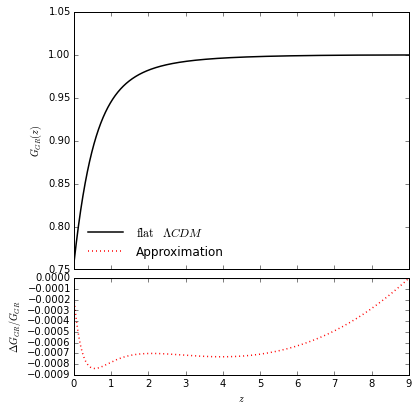

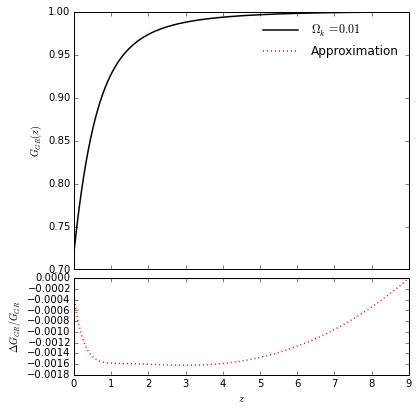

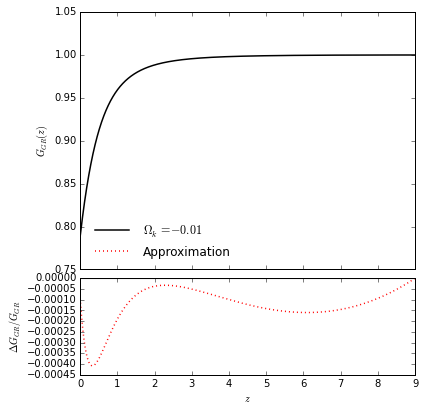

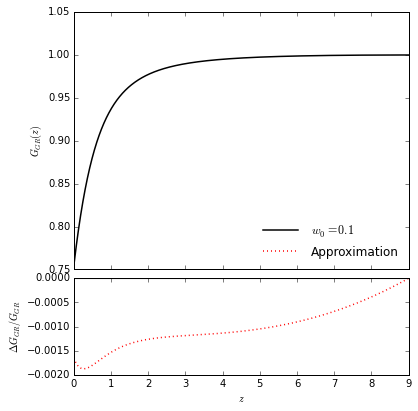

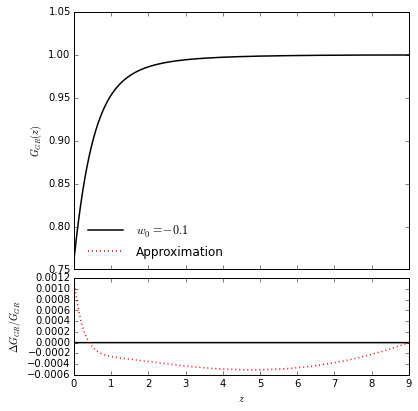

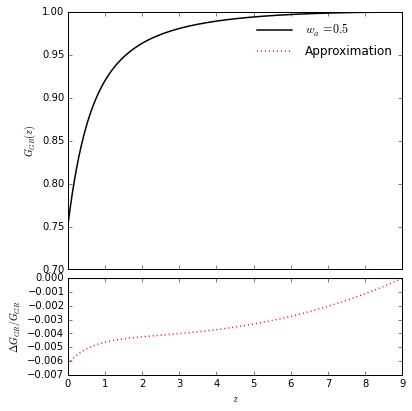

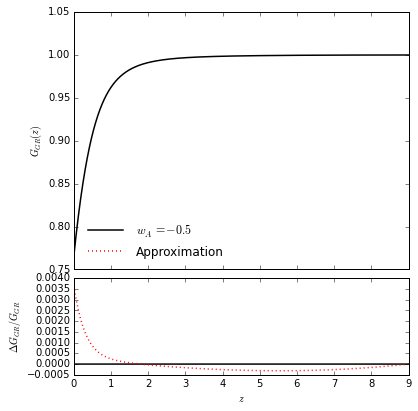

In [24]:
#Series of comparisons between growth function and approximation to the growth function
#    for different cosmological models
plot_comp(t, (1+t) * grow1[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapp1[::-1] / 10, 'Approximation'))
plot_comp(t, (1+t) * growpos[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapppos[::-1] / 10, 'Approximation'),
         mainlabel = '$\Omega_k = 0.01$')
plot_comp(t, (1+t) * growneg[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growappneg[::-1] / 10, 'Approximation'),
         mainlabel = '$\Omega_k = -0.01$')
plot_comp(t, (1+t) * grow9[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapp9[::-1] / 10, 'Approximation'),
         mainlabel = '$w_0 = 0.1$')
plot_comp(t, (1+t) * grow11[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapp11[::-1] / 10, 'Approximation'),
         mainlabel = '$w_0 = -0.1$')
plot_comp(t, (1+t) * grow5[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapp5[::-1] / 10, 'Approximation'),
         mainlabel = '$w_a = 0.5$')
plot_comp(t, (1+t) * grow15[:,0] / 10, '$G_{GR}(z)$', '$\Delta G_{GR}/G_{GR}$',
          comp1=((1+t) * growapp15[::-1] / 10, 'Approximation'),
         mainlabel = '$w_A = -0.5$')

In [25]:
def get_class_parameters(cosmology):
    """
    Get CLASS parameters corresponding to an astropy cosmology model.
    """
    class_parameters = {}
    try:
        class_parameters['h'] = cosmology.h
        class_parameters['T_cmb'] = cosmology.Tcmb0.value
        class_parameters['Omega_b'] = cosmology.Ob0
        # CDM = M - B (cdm only models)
        class_parameters['Omega_cdm'] = cosmology.Om0 - cosmology.Ob0
        class_parameters['Omega_k'] = cosmology.Ok0
        # Dark energy sector. CLASS will calculate whichever of
        # Omega_Lambda/fld/scf we do not provide.
        class_parameters['Omega_scf'] = 0.
        try:
            # Only subclasses of wCDM have the w0 attribute.
            class_parameters['w0_fld'] = cosmology.w0
            class_parameters['wa_fld'] = cosmology.wa
            class_parameters['Omega_Lambda'] = 0.
        except AttributeError:
            class_parameters['Omega_fld'] = 0.
        class_parameters['N_ncdm'] = 0
        class_parameters['N_ur'] = cosmology.Neff
    except AttributeError:
        raise ValueError('Cosmology is missing required attributes.')
    return class_parameters

def calculate_power(cosmology, k_min, k_max, z=0, num_k=500, scaled_by_h=True,
                    n_s=0.9619, logA=3.0980):
    """
    Calculate the power spectrum P(k,z) over the range k_min <= k <= k_max.
    """
    class_parameters = get_class_parameters(cosmology)
    class_parameters['output'] = 'mPk'
    if scaled_by_h:
        class_parameters['P_k_max_h/Mpc'] = k_max
    else:
        class_parameters['P_k_max_1/Mpc'] = k_max
    class_parameters['n_s'] = n_s
    class_parameters['ln10^{10}A_s'] = logA
    cosmo.set(class_parameters)
    cosmo.compute()

    if scaled_by_h:
        k_scale = cosmo.h()
        Pk_scale = cosmo.h()**3
    else:
        k_scale = 1.
        Pk_scale = 1.

    result = np.empty((num_k,), dtype=[('k', float), ('Pk', float)])
    result['k'][:] = np.logspace(np.log10(k_min), np.log10(k_max), num_k)
    for i, k in enumerate(result['k']):
        result['Pk'][i] = cosmo.pk(k * k_scale, z) * Pk_scale

    cosmo.struct_cleanup()
    cosmo.empty()

    return result

def calculate_Cl(cosmology, l_max, n_s=0.9619, logA=3.0980):
    """
    Calculate the CMB angular power spectrum Cl values.
    """
    class_parameters = get_class_parameters(cosmology)
    class_parameters['output'] = 'tCl,pCl,lCl'
    class_parameters['n_s'] = n_s
    class_parameters['ln10^{10}A_s'] = logA
    cosmo.set(class_parameters)
    
    cosmo.compute()
    result = cosmo.raw_cl(l_max)
    
    cosmo.struct_cleanup()
    cosmo.empty()

    return result

In [26]:
cosmo = Class()

In [27]:
power1 = calculate_power(cosmo1, 0.001, 2.0)
powerpos = calculate_power(cosmopos, 0.001, 2.0)
powerneg = calculate_power(cosmoneg, 0.001, 2.0)
power9 = calculate_power(cosmo9, 0.001, 2.0)
power11 = calculate_power(cosmo11, 0.001, 2.0)
power5 = calculate_power(cosmo5, 0.001, 2.0)
power15 = calculate_power(cosmo15, 0.001, 2.0)
k = power1['k']

In [28]:
Clharm1 = calculate_Cl(cosmo1, 2500)
Clharmpos = calculate_Cl(cosmopos, 2500)
Clharmneg = calculate_Cl(cosmoneg, 2500)
Clharm9 = calculate_Cl(cosmo9, 2500)
Clharm11 = calculate_Cl(cosmo11, 2500)
Clharm5 = calculate_Cl(cosmo5, 2500)
Clharm15 = calculate_Cl(cosmo15, 2500)
l = Clharm1['ell']

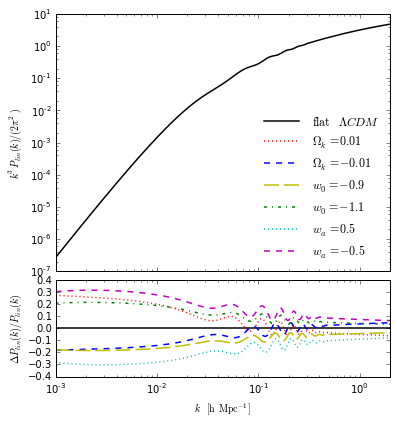

In [29]:
#Linear variance of matter fluctuations
Pkcoeff = (k ** 3) / (2 * np.pi * np.pi)
plot_comp(k, Pkcoeff * power1['Pk'], '$k^3 P_{lin}(k)/(2 \pi^2)$',
          '$\Delta P_{lin}(k)/P_{lin}(k)$', xlabel = '$k \; [\mathrm{h} \, \mathrm{Mpc^{-1}}]$',
          comp1=(Pkcoeff * powerpos['Pk'], '$\Omega_k=0.01$'),
          comp2=(Pkcoeff * powerneg['Pk'], '$\Omega_k=-0.01$'),
          comp3=(Pkcoeff * power9['Pk'], '$w_0=-0.9$'),
          comp4=(Pkcoeff * power11['Pk'], '$w_0=-1.1$'),
          comp5=(Pkcoeff * power5['Pk'], '$w_a=0.5$'),
          comp6=(Pkcoeff * power15['Pk'], '$w_a=-0.5$'),
          xscale = 'log', yscale = 'log',
          xlim = [0.001,2])

/home/kenny/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


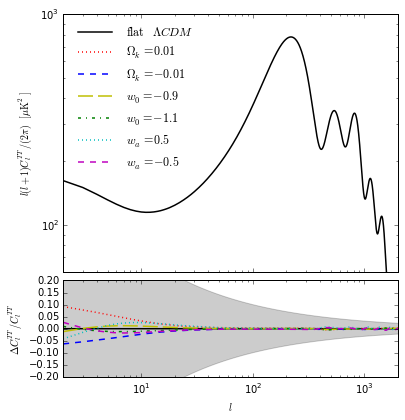

In [30]:
#CMB angular power spectrum
#    Comparisons plotted against cosmic variance (shaded region)
Clcoeff = l * (l + 1) / (2 * np.pi)
CV = ((2.0 * l + 1.0) / 2.0) ** -0.5
plot_comp(l[2:], (Clcoeff * Clharm1['tt'] * 1e12)[2:], '$l(l+1)C_l^{TT}/(2 \pi) \; [\mathrm{\mu K^2}]$',
          '$\Delta C_l^{TT}/C_l^{TT}$', xlabel = '$l$',
          comp1=((Clcoeff * Clharmpos['tt'] * 1e12)[2:], '$\Omega_k=0.01$'),
          comp2=((Clcoeff * Clharmneg['tt'] * 1e12)[2:], '$\Omega_k=-0.01$'),
          comp3=((Clcoeff * Clharm9['tt'] * 1e12)[2:], '$w_0=-0.9$'),
          comp4=((Clcoeff * Clharm11['tt'] * 1e12)[2:], '$w_0=-1.1$'),
          comp5=((Clcoeff * Clharm5['tt'] * 1e12)[2:], '$w_a=0.5$'),
          comp6=((Clcoeff * Clharm15['tt'] * 1e12)[2:], '$w_a=-0.5$'),
          compfill=(CV[2:], -CV[2:]), xscale = 'log', yscale = 'log',
          diffylim = [-0.2,0.2], mainylim = [60, 1e3], xlim = [2, 2000])

The variance of density field smoothed by a window function $W_R$ of scale $R$ (Fourier transform $\widetilde{W}_R(k)$) is
$$\sigma^2(R) = \int_0^\infty \mathrm{d}k \, \frac{k^2 P(k)}{2 \pi^2} \widetilde{W}_R^2(k),$$
where $P(k)$ is the power spectrum.

For a top hat window,
$$\widetilde{W}_R(k) = \frac{3}{k^3 R^3} \left[ \sin(kR) - kR \cos(kR) \right],$$
and
$$\sigma^2(R) = \int_0^\infty \mathrm{d}k \, \frac{9 P(k)}{2 k^4 R^6 \pi^2} \left[ \sin(kR) - kR \cos(kR) \right] ^2.$$

Using a mass scale $M = 4 \pi R^3 \bar{\rho}_m / 3$ for the cutoff gives
$$\mathrm{d} M = 4 \pi R^2 \bar{\rho}_m \mathrm{d} R$$
as well as a length of
$$R = \left( \frac{3M}{4 \pi \bar{\rho}_m} \right) ^{1/3},$$
where
$$\bar{\rho}_m = \frac{3H_0^2}{8 \pi G}\Omega_m,$$
so
$$R = \left( \frac{2MG}{H_0^2 \Omega_m} \right) ^{1/3}.$$

Using $\sigma^2(R)$, the halo mass function can be written as
$$\frac{\mathrm{d}n}{\mathrm{d} \ln M} = f(\sigma) \bar{\rho}_m \left| \frac{\mathrm{d} \ln \sigma}{\mathrm{d} M} \right|,$$
where
$$f(\sigma) = A \left[ \left( \frac{\sigma}{b}^{-a} \right) + 1 \right] \exp^{-c / \sigma^2}.$$
Here, values of $A = 0.186$, $a = 1.47$, $b = 2.57$, and $c = 1.19$ are used for halos at $z = 0$ defined by \[1].

For simplicity, the mass derivative can be rewritten as
\begin{align}
\bar{\rho}_m \left| \frac{\mathrm{d} \ln \sigma}{\mathrm{d} M} \right| &=
\frac{\bar{\rho}_m}{2} \left| \frac{\mathrm{d} \ln \sigma^2}{\mathrm{d} M} \right| \\
&= \frac{1}{8 \pi R^2} \left| \frac{1}{\sigma^2} \frac{\mathrm{d} \sigma^2}{\mathrm{d} R} \right| \\
&= \frac{1}{8 \pi R^2} \left| \frac{1}{\sigma^2} \int_0^\infty \frac{9 P(k)}{\pi^2 k^2 R^5} \left[ \sin^2(kR) - kR \sin(kR) \cos(kR) \right] - \frac{6}{R} \right|.
\end{align}

Using $\delta_c = 1.686$, we have the bias factor for halos:
$$b_h(M) = 1 + \frac{\frac{\delta_c^2}{\sigma(M)^2} - 1}{\delta_c}$$

In [31]:
def mass_to_length(cosmology, M):
    """
    Returns length scale corresponding to mass scale in a given cosmology
    
    Arguments:
        cosmology (astropy.cosmology): cosmology in which to calculate sigma^2
        M (np.array): mass scale to use
    
    Returns:
        R (np.array): the length scale corresponding to given mass scale in units of h^-1 Mpc
    """
    R = (2.0 * M * const.M_sun * const.G /
         (10000 * u.km ** 2 * cosmology.Om0 / (u.s ** 2 * u.Mpc ** 2))).to(u.Mpc ** 3) ** (1.0 / 3.0)
    R = R.value
    return R
def sigma2(cosmology, R, Pk):
    """
    Returns sigma^2, the variance of the density field smoothed with top hat window function
        (of mass scale M)
    
    Arguments:
        cosmology (astropy.cosmology): cosmology in which to calculate sigma^2
        R (np.array): length scale of top-hat window function to use
        Pk (np.array): power spectrum P(k)
    
    Returns:
        sig2 (np.array): sigma^2 of R
    """
    sigconst = 9.0 * k ** -4 / (2.0 * np.pi ** 2)
    coeff = (np.sin(k * R) ** 2 - 2.0 * k * R * np.sin(k * R) * np.cos(k * R) +
             k ** 2 * R ** 2 * np.cos(k * R) ** 2) * R ** -6
    sig2 = scipy.integrate.trapz(sigconst * coeff * Pk, k)
    return sig2
def f_sigma(sig2):
    """
    Return function of variance of density field
    
    Arguments:
        sig2 (np.array): values of sigma^2 at desired length scales
    
    Returns:
        f (np.array): function of sigma
    """
    A, a, b, c = (0.186, 1.47, 2.57, 1.19)
    coeff = (np.sqrt(sig2) / b) ** -a + 1
    exponent = -c * sig2 ** -1
    f = A * coeff * np.exp(exponent)
    return f

In [32]:
def mass_func(cosmology, R, Pk):
    """
    Returns halo mass function
    
    Arguments:
        cosmology (astropy.cosmology): cosmology in which to calculate sigma^2
        R (np.array): lentgh scale of top-hat window function to use
        Pk (np.array): power spectrum P(k)
    
    Returns:
        result (np.array): halo mass function
    """
    sig2 = sigma2(cosmology, R, Pk)
    f_sig = f_sigma(sig2)
    integrand = (9.0 * Pk * (np.sin(k * R) ** 2 - k * R * np.sin(k * R) * np.cos(k * R))
                 / (np.pi ** 2 * k ** 2 * R ** 5))
    integrated = scipy.integrate.trapz(integrand, k)
    R = R.reshape(len(R))
    dlnsigdM = (-6.0 * R ** -1 + integrated * sig2 ** -1) / (8.0 * np.pi * R ** 2)
    result = f_sig * np.abs(dlnsigdM)
    return result

In [33]:
def halo_bias(cosmology, R, Pk):
    """
    Returns halo bias factor
    
    Arguments:
        cosmology (astropy.cosmology): cosmology in which to calculate sigma^2
        R (np.array): length scale of top-hat window function to use
        Pk (np.array): power spectrum P(k)
    
    Returns:
        result (np.array): halo bias factor
    """
    del_c = 1.686
    sig2 = sigma2(cosmology, R, Pk)
    num = (del_c ** 2 * sig2 ** -1) - 1.0
    frac = num / del_c
    result = frac + 1.0
    return result

In [34]:
Mass_scale = np.linspace(1e12, 3e15, num = 3001).reshape((3001,1))

In [35]:
mass1 = mass_func(cosmo1, mass_to_length(cosmo1, Mass_scale), power1['Pk'])
masspos = mass_func(cosmopos, mass_to_length(cosmopos, Mass_scale), powerpos['Pk'])
massneg = mass_func(cosmoneg, mass_to_length(cosmoneg, Mass_scale), powerneg['Pk'])
mass9 = mass_func(cosmo9, mass_to_length(cosmo9, Mass_scale), power9['Pk'])
mass11 = mass_func(cosmo11, mass_to_length(cosmo11, Mass_scale), power11['Pk'])
mass5 = mass_func(cosmo5, mass_to_length(cosmo5, Mass_scale), power5['Pk'])
mass15 = mass_func(cosmo15, mass_to_length(cosmo15, Mass_scale), power15['Pk'])

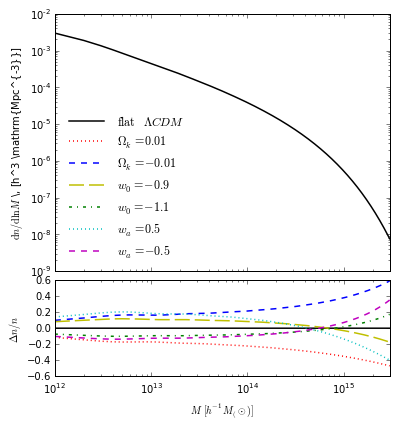

In [36]:
#Halo mass function
plot_comp(Mass_scale, mass1, '$\mathrm{d} n / \mathrm{d} \ln M$ \, [h^3 \mathrm{Mpc^{-3}}]',
          '$\Delta n/n$', xlabel = '$M \, [h^{-1} M_(\odot)]$',
          comp1=(masspos, '$\Omega_k=0.01$'), comp2=(massneg, '$\Omega_k=-0.01$'),
          comp3=(mass9, '$w_0=-0.9$'), comp4=(mass11, '$w_0=-1.1$'),
          comp5=(mass5, '$w_a=0.5$'), comp6=(mass15, '$w_a=-0.5$'),
          xscale = 'log', yscale = 'log', xlim = [1e12, 3e15])

In [37]:
bias1 = halo_bias(cosmo1, mass_to_length(cosmo1, Mass_scale), power1['Pk'])
biaspos = halo_bias(cosmopos, mass_to_length(cosmopos, Mass_scale), powerpos['Pk'])
biasneg = halo_bias(cosmoneg, mass_to_length(cosmoneg, Mass_scale), powerneg['Pk'])
bias9 = halo_bias(cosmo9, mass_to_length(cosmo9, Mass_scale), power9['Pk'])
bias11 = halo_bias(cosmo11, mass_to_length(cosmo11, Mass_scale), power11['Pk'])
bias5 = halo_bias(cosmo5, mass_to_length(cosmo5, Mass_scale), power5['Pk'])
bias15 = halo_bias(cosmo15, mass_to_length(cosmo15, Mass_scale), power15['Pk'])

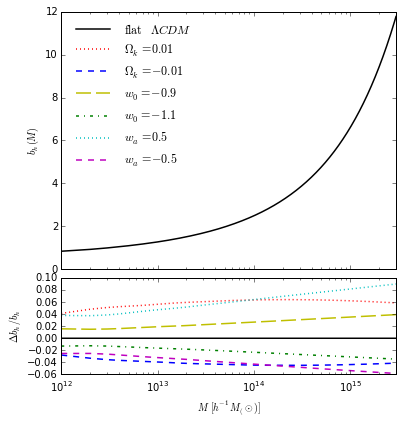

In [38]:
#Halo bias factor
plot_comp(Mass_scale, bias1, '$b_h (M)$', '$\Delta b_h/b_h$',
          xlabel = '$M \, [h^{-1} M_(\odot)]$',
          comp1=(biaspos, '$\Omega_k=0.01$'), comp2=(biasneg, '$\Omega_k=-0.01$'),
          comp3=(bias9, '$w_0=-0.9$'), comp4=(bias11, '$w_0=-1.1$'),
          comp5=(bias5, '$w_a=0.5$'), comp6=(bias15, '$w_a=-0.5$'),
          xscale = 'log', xlim = [1e12, 3e15])